### Classification |Data exploration using iris toy dataset

**Dataset**: We are going to use the famous iris data set for our example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. Further details of the dataset are available at [UCI](https://archive.ics.uci.edu/ml/datasets/iris).

In [101]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [102]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

Bunch is similar to a dictionary in that it contains key-value pairs.

In [103]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Printing the keys, we see that they are the feature names. DESCR, which provides a description of the dataset; the target names; the data, which contains the values features; and the target which is the target data. And both the features and target data are provided as NumPy arrays. 

In [104]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [105]:
iris.data.shape

(150, 4)

The `.shape` attribute of the array feature tell us that there are 150 rows and four columns. **Remember:** Samples are in rows, features are in columns. Thus we have 150 samples and the four features: petal length and width and sepal lenght and width. Moreover, note that the target variable is enconded as zero for "setosa", 1 for "versicolor" and 2 for "virginica". We see this by printing iris.target_names.

In [106]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In order to perform some initial exploratory data analysis (EDA). Will build a DataFrame of the feature data using pandas, and also passing columns names.

In [107]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


Viewing the head of the data frame show us the first five rows. Now, we'll do a bit visual EDA. We use the pandas function scatter matrix to visualize our dataset. We pass it the our DataFrame, along with our target variable as argument to the parameter **c**, which stands for color, ensuring that our data points in our figure will be colored by their species. We also pass a list to fig size of our figure, as well as a marker size and shape. 

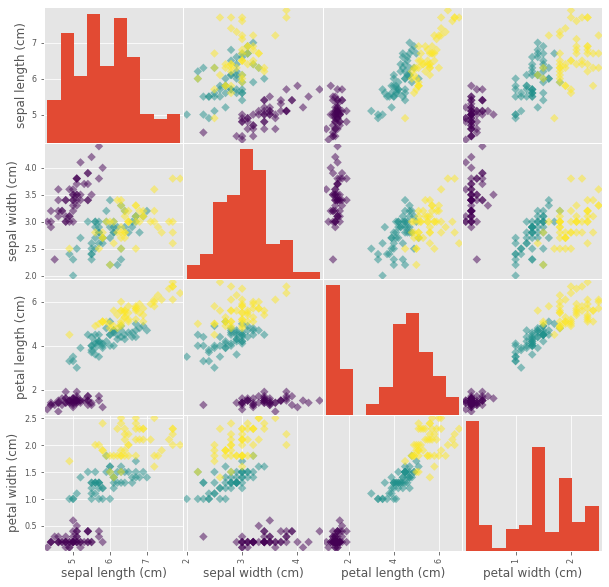

In [108]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = (10,10), marker = 'D')

The result is a matrix of figures, which on the diagonal are histograms of the features corresponding to the row and column. The off-diagonal figures are scatter plots of the column feature versus row feature colored by the target variable. There is a great deal of information in this scatter matrix. The petal hight and lenght are highly correlated, as you may expect, and that flowers are clustered according to species.  

**Classification**


We have a set of labeled data and we want to build a classifier that takes unlabeled data as input and output a label. 

To construct this classifier:
We first need choose a type of classifier and it needs to learn from the already labeled data. For this reason, we call the already labeled data the training data. 

I choose a simple algorithm called **K-Nearst Neighbors**. 

- Basic ideia of KNN: Predict the label of any data point by:
    - Looking at the 'k' closest labeled data points.
    - Taking a majority vote.


**Scikit-learn fit and predict**

All machine learning models in scikit-learn are implemented as python classes. These classes serve two purposes: 
  - They implement the algotithms for learning and predicting.
  - Store the information learned from the data.

Training a model on the data = 'fitting' a model to the data: `.fit()` method.

To predict the labels of new data: `.predit()` method.

**Using scikit-learn to fit a classifier**

First we import KNN Classifier from sklearn. We then instatiante our KNeighborsClassifier, set the number of neighbors equal to 6, and assign it to the variable knn. Then we can fit this classifier to our training set, the labeled data.

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

The features and target, used as arguments to fit are NumPy arrays. The scikit-learn API requires firstly that you have the data as a NumPy array or pandas DataFrame. It also requires that the features take on continuous values, and It also requires that there are no missing values in the data. 

_Later, I will discuss how to deal with categorical features and missing data. In particular, the scikit-learn API requires that the features are in an array where each column is a feature and each row a different observation or data point._

Now that we have fit our classifier, lets use it to predict on some unlabeled data. 



**Predicting on unlabeled data**

In [110]:
# Here we have set of observations, x_new. 
# We use the predict method on the classifier and pass it the data.
# This is a randomic array to set of observations.

X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                 [5.7, 2.6, 3.8, 1.3],
                 [4.7, 3.2, 1.3, 0.2]])

prediction = knn.predict(X_new)

In [111]:
X_new.shape
# That is, three observations and four features

(3, 4)

In [112]:
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


It predicts one, which correspondes to 'versicolor' for the first two observations and 0, which correspons to 'setosa' for the third. 

**Measuring model perfomance**

Now that we know to fit a classifier and use it to predict the labels of previouly unseen data, we need to figure out how to measure its performance. We need a metric.

- In classification problems, __accuracy__ is a commonly-used metric. 
- Accuracy = Fraction of correct predictions. 
- Which data should be used to compute accuracy?

What we are really insterested in is: __how well our model will perform on new data?__ that is, samples that the algorithm has never seen before. 

You could compute accuracy on data used to fit classifier. However, as this data was used to train it, the classifier's perfomance will NOT be indicative of how well it can generalize to unseen data. 

For this reason, it is common pratice to __split your data into two sets__, a training set and a test set. 

- Fit/train the classifier on the training set.
- Make predictions on the labeled test set.
- Compare theses predictions with the know labels.
- Compute the accuracy of your predictions.

**Train/Test split**

To do this, we first import train test split from sklearn model selection. We then use the train test split function to randomly split our data. 

The first argument will be the feature data, the second the target or labels. The test size keyword argument specifies what proportion of the original data is used for the test set. Lastly, the random state kward sets a seed for the random number generator that splits the data into trains and test. Setting the seed with the same argument later will allow you to reproduce the exact split and your downstream results. 

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 21, stratify=y)

The train test split returns four arrays: The training data, the test data, the training label and the test labels.

By default, the function splits the data into 75% training data and 25% test data, which is a good rule of thumb. We specify the size of the test size using the keyword argument `test_size`, which we do here to set it to 30%. 

It's also best pratice to perfome your split so that the split reflects to the labels on your data. That is, you want the labels to be distributed in train and test sets as they are in the original dataset. To achieve this, we use the keyword argument `stratify = y`, where **y** the list or array containing the labels. 

Then instantiate our KNN classifier, fit it to the training data using the **fit** method, make our predictions on the test data and store the results as `y_pred`.

In [114]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


The check out the accuracy of our model, we use the score method and pass it `X_test` and `y_test`.

In [115]:
knn.score(X_test,y_test)

0.9555555555555556

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



**Model Complexity**

- Larger k = smoother decision boundary = less complex model
- Smaller k = more complex model = can lead to overfitting

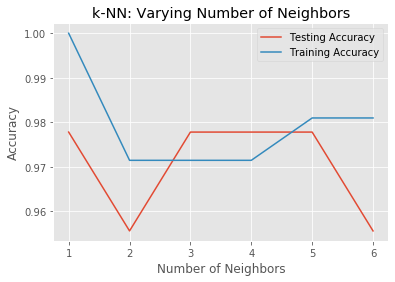

In [117]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
